In [1]:
!pip install gdown

In [2]:
 !gdown https://drive.google.com/uc?id=13Kwb-19DS9CLSUOMokhsjKtutQXSDUT5

Downloading...
From: https://drive.google.com/uc?id=13Kwb-19DS9CLSUOMokhsjKtutQXSDUT5
To: /content/Copy of shopee-product-detection-dataset.zip
10.1GB [03:39, 45.9MB/s]


In [7]:
!apt-get install p7zip-full
!7za x shopee_dataset.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 10069790881 bytes (9604 MiB)

Extracting archive: shopee_dataset.zip
  3% 4096 Open              --
Path = shopee_dataset.zip
Type = zip
Physical Size = 10069790881
64-bit = +

  0%      0% 223 - test/test/04def677d2fb5d1ce91d17f85e60fbba.jpg                                  

In [8]:
import os
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import RMSprop
from keras.optimizers import Adam
import pandas as pd 
import warnings 
import glob
import os.path as osp
warnings.filterwarnings("ignore")
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os 
import random 
import sys
from itertools import chain 
from skimage.io import imread,imshow,imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.utils import Progbar
#import tensorflow
import glob
import re
import skimage
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plot
import cv2
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

warnings.filterwarnings('ignore', category = UserWarning, module = 'skimage')

#Setting Seed 
TEST_PATH = "test/test/"
TRAIN_PATH = "train/train/"

from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras import applications
import six
from keras.models import Model
from keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten
)
from keras.layers.convolutional import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D
)
from keras.layers.merge import add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


def cnn4_model():

    cnn4 = Sequential()
    cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
    cnn4.add(BatchNormalization())

    cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(MaxPooling2D(pool_size=(2, 2)))
    cnn4.add(Dropout(0.25))

    cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(Dropout(0.25))

    cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(MaxPooling2D(pool_size=(2, 2)))
    cnn4.add(Dropout(0.25))

    cnn4.add(Flatten())

    cnn4.add(Dense(512, activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(Dropout(0.5))

    cnn4.add(Dense(128, activation='relu'))
    cnn4.add(BatchNormalization())
    cnn4.add(Dropout(0.5))

    cnn4.add(Dense(42, activation='softmax'))
    return cnn4

def cnn_model():
    model = Models.Sequential()

    model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
    model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
    model.add(Layers.MaxPool2D(5,5))
    model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
    model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
    model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
    model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
    model.add(Layers.MaxPool2D(5,5))
    model.add(Layers.Flatten())
    model.add(Layers.Dense(180,activation='relu'))
    model.add(Layers.Dense(100,activation='relu'))
    model.add(Layers.Dense(50,activation='relu'))
    model.add(Layers.Dropout(rate=0.5))
    model.add(Layers.Dense(42,activation='softmax'))

    model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

    model.summary()
    return model


In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(validation_split = 0.2,rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
directory=TRAIN_PATH,
subset = 'training',
target_size=(256, 256),
color_mode="rgb",
batch_size=64,
class_mode="categorical",
shuffle=True,
seed = 42,
)
valid_generator = train_datagen.flow_from_directory(
directory=TRAIN_PATH,
subset = 'validation',
target_size=(256, 256),
color_mode="rgb",
batch_size=64,
class_mode="categorical",
shuffle=True,
seed = 42
)
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size



Found 84331 images belonging to 42 classes.
Found 21061 images belonging to 42 classes.


In [11]:
 !gdown https://drive.google.com/uc?id=1EdZ-Gi2QkIA_wFLlF4okDSwmNKRCxo6x
!7za x inceptionv3_models.zip

Downloading...
From: https://drive.google.com/uc?id=1EdZ-Gi2QkIA_wFLlF4okDSwmNKRCxo6x
To: /content/inceptionv3_models.zip
170MB [00:01, 98.9MB/s]

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 169717474 bytes (162 MiB)

Extracting archive: inceptionv3_models.zip
--
Path = inceptionv3_models.zip
Type = zip
Physical Size = 169717474

  0%     10% 1 - inception_v3_weights_tf_dim_ordering_tf_kernels.h5                                                            21% 1 - inception_v3_weights_tf_dim_ordering_tf_kernels.h5                                                           

In [14]:
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (256, 256, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(42, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['categorical_accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience = 4)
mc = ModelCheckpoint('best_model_inception.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model

history=model.fit_generator(train_generator,steps_per_epoch = STEP_SIZE_TRAIN,validation_data = valid_generator,validation_steps = STEP_SIZE_VALID,epochs=10,callbacks=[es,mc])

# pre_trained_model.summary()


last layer output shape:  (None, 14, 14, 768)
Epoch 1/10
1317/1317 [==============================] - 773s 587ms/step - loss: 1.4736 - categorical_accuracy: 0.6103 - val_loss: 1.1954 - val_categorical_accuracy: 0.6662
Epoch 2/10
1317/1317 [==============================] - 783s 594ms/step - loss: 0.6221 - categorical_accuracy: 0.8267 - val_loss: 1.1960 - val_categorical_accuracy: 0.6650
Epoch 3/10
1317/1317 [==============================] - 774s 588ms/step - loss: 0.2612 - categorical_accuracy: 0.9280 - val_loss: 1.5312 - val_categorical_accuracy: 0.6681
Epoch 4/10
1317/1317 [==============================] - 820s 623ms/step - loss: 0.1347 - categorical_accuracy: 0.9648 - val_loss: 1.5867 - val_categorical_accuracy: 0.6599
Epoch 5/10
1317/1317 [==============================] - 827s 628ms/step - loss: 0.1003 - categorical_accuracy: 0.9737 - val_loss: 1.2561 - val_categorical_accuracy: 0.6680
Epoch 00005: early stopping


In [15]:
def VGG16():
  model = Sequential()
  model.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=42, activation="softmax"))
  print(model.summary())
  return model

In [ ]:
vgg16 = VGG16()
vgg16.compile(optimizer = Adam(lr=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['categorical_accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience = 4)
mc = ModelCheckpoint('vgg16_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model

history=model.fit_generator(train_generator,steps_per_epoch = STEP_SIZE_TRAIN,validation_data = valid_generator,validation_steps = STEP_SIZE_VALID,epochs=10,callbacks=[es,mc])


Plotting the loss and accuracy


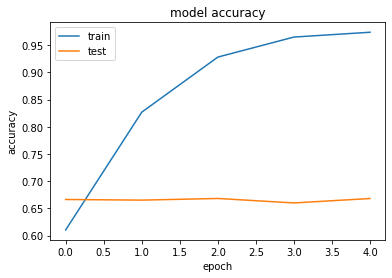

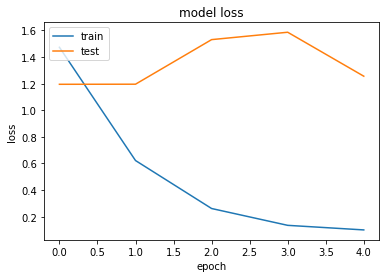

In [30]:
#history.save("inceptionv3_hist.h5")
#print("Saved model to disk")
print("Plotting the loss and accuracy")
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])